In [1]:
"""
Work for Applied Problem 1: 

Cross-Validation.  For this problem, you can consider binary classification of
the digits 3 and 8.  Code up K-fold cross-validation (from scratch) and use your 
function to tune hyper-parameters for sparse logistic regression and linear SVMs. 
Plot the cross-validation error curve along with the training and test error.  
Compare which hyperparameters your cross-validation procedure selects to those
from builtin  functions.   Reflect  on  your  results.   (Hint:  You  may  consider
using  the  logistic  log-likelihood  or binomial deviance loss instead of the 
miss-classification error for this problem.)
"""


'\nWork for Applied Problem 1: \n\nCross-Validation.  For this problem, you can consider binary classification of\nthe digits 3 and 8.  Code up K-fold cross-validation (from scratch) and use your \nfunction to tune hyper-parameters for sparse logistic regression and linear SVMs. \nPlot the cross-validation error curve along with the training and test error.  \nCompare which hyperparameters your cross-validation procedure selects to those\nfrom builtin  functions.   Reflect  on  your  results.   (Hint:  You  may  consider\nusing  the  logistic  log-likelihood  or binomial deviance loss instead of the \nmiss-classification error for this problem.)\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from os import sys
sys.path.append("../../../machine_learning_tools/")

In [4]:
import sklearn_utils as sklu
import sklearn_models as sklm

In [37]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Data

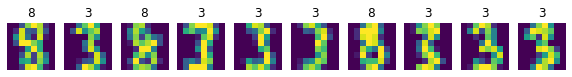

In [57]:
#Load data
n_classes = 10
digits = load_digits(n_class=n_classes)
X = digits.images
y = digits.target
n_total = X.shape[0]

#Shuffle the data
ind = np.random.permutation(n_total)
X = X[ind,:,:]
y = y[ind]

#filtering for only the 3 and 8 digits
three_eight_maks = (y == 3) | (y == 8)
X = X[three_eight_maks]
y = y[three_eight_maks]

#Plot
n_images = 10
plt.figure(figsize=[n_images,n_images])
for i in range(n_images):
    plt.subplot(1,n_images,i+1)
    plt.imshow(X[i])
    plt.axis('off')
    plt.title(str(y[i]))
plt.show()

In [58]:
#reshaping data into dataframe
X_flat = X.reshape(len(X),-1)
X = pd.DataFrame.from_records(X_flat)
y_ones = np.ones(len(X)).astype("int")
y_ones[y == 3] = 0
y = pd.Series(y_ones)
y

0      1
1      0
2      1
3      0
4      0
      ..
352    0
353    1
354    1
355    0
356    0
Length: 357, dtype: int64

# The Models that will be used

In [49]:
# sparse logistic regression
from sklearn import linear_model
linear_model.LogisticRegression(penalty = "L1")

"""
For logistic regression the C is the only hyper parameters
C: inverse of regularization strength, smaller values are more regularized
"""

#linear svm
from sklearn.svm import SVC
SVC(kernel = "linear")

"""
Only parameter to optimize for is C, regularization 
(L2 norm pernalty)
"""

SVC(kernel='linear')

In [67]:
clf = linear_model.LogisticRegression(penalty = "l1",
                                     solver="saga",
                                     max_iter=10000,
                                     C = 1)
clf.fit(X,y)

LogisticRegression(C=1, max_iter=10000, penalty='l1', solver='saga')

In [68]:
import visualizations_ml as vml
clf.score(X,y)

1.0

In [69]:
clf = linear_model.LogisticRegressionCV(penalty = "l1",
                                     solver="saga",
                                     max_iter=10000)
clf.fit(X,y)

LogisticRegressionCV(max_iter=10000, penalty='l1', solver='saga')

# Implementing K-fold Cross Validation

In [45]:
n_splits = 5

(X_train,
 X_val,
 X_test,
 y_train,
 y_val,
 y_test) = sklu.train_val_test_split(
    X,
    y,
    test_size = 0.2,
    val_size = 0.2,
    verbose = True)

X_train_val = pd.concat([X_train,X_val])
y_train_val = pd.concat([y_train,y_val])

fold_dfs = sklu.k_fold_df_split(
    X_train_val,
    y_train_val,
    n_splits = n_splits)


for fold_idx,fold_data in fold_dfs.items():
#     # create and train all of the models
#     df = fold_data["X_train"],
#             y  = fold_data["y_train"],
    
    
#     mse = sklu.MSE(fold_data["y_test"],
#                      model=best_model,
#                     X=fold_data["X_test"])
    
    

For Train/Val/Test split of None/0.2/0.2 = 213/72/72


In [ ]:
rfe_optimal_k,ret_df = sklu.optimal_parameter_from_mse_kfold_df(
rfe_df,
parameter_name = "k",
columns_prefix = "mse_fold",
higher_param_higher_complexity = True,
standard_error_buffer = True,
verbose = False,
return_df = True
                             )